# Importing the Required Libraries

In [3]:
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
import warnings
warnings.filterwarnings("ignore")

### Loading the Data 

In [6]:
data = pd.read_csv("insurance.csv")
data1=data

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Missing Values 

In [13]:
np.sum(data.isna())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Exploratory Data Analysis And Transformation

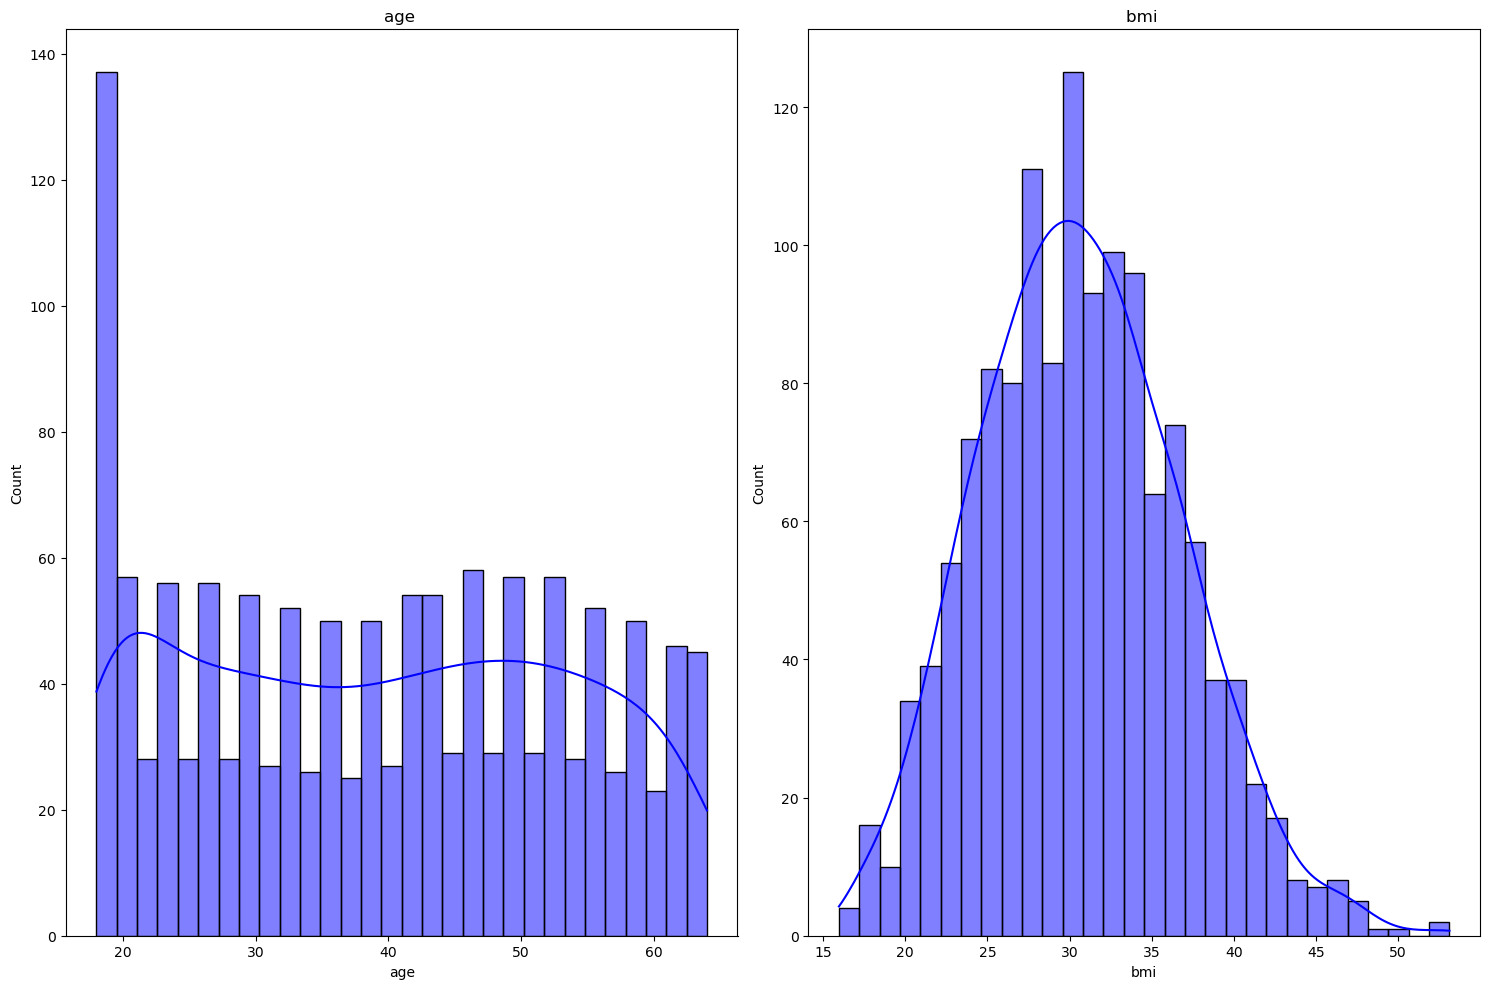

In [20]:
numerical_features = ["age", "bmi"]
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(data=data, x=feature, bins=30, kde=True, color='blue')
    plt.title(f'{feature} ')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()

[]

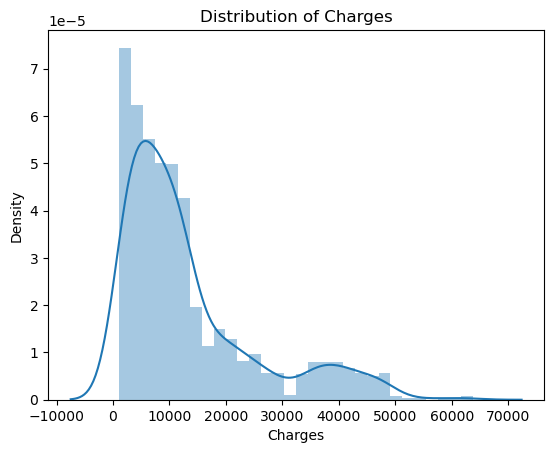

In [22]:
sns.distplot(data['charges'])
plt.title("Distribution of Charges")
plt.xlabel("Charges")
plt.plot()

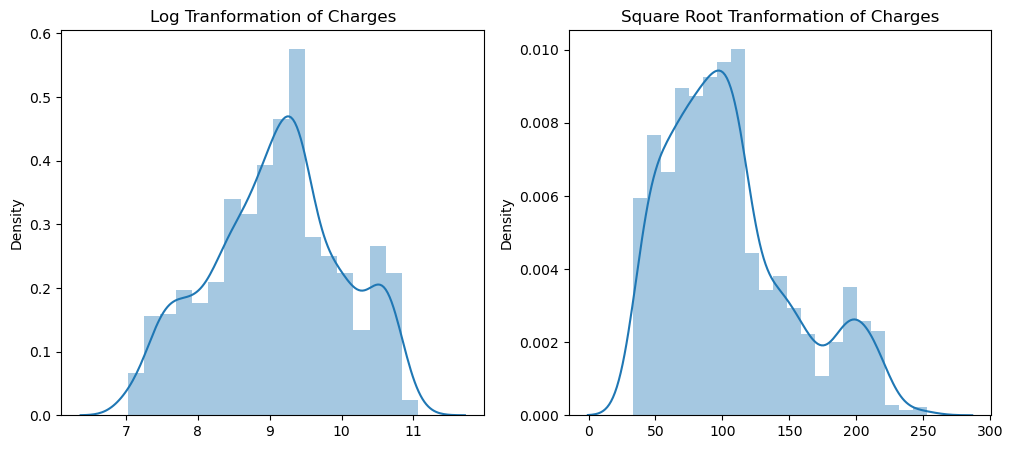

In [24]:
fig,axs = plt.subplots(1,2, figsize=(12,5))
sns.distplot(x=np.log(data['charges']),ax=axs[0])
axs[0].set_title("Log Tranformation of Charges")
sns.distplot(x=np.sqrt(data['charges']),ax=axs[1])
axs[1].set_title("Square Root Tranformation of Charges")
plt.show()

In [26]:
data['ln_charges']=np.log(data['charges'])

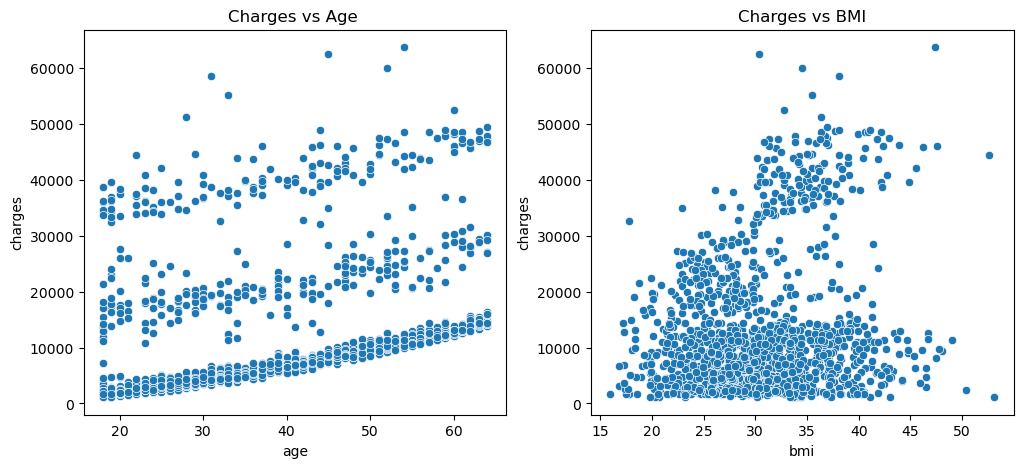

In [28]:
fig,axs = plt.subplots(1,2, figsize=(12,5))
sns.scatterplot(x="age",y="charges",data=data,ax=axs[0])
axs[0].set_title("Charges vs Age ")
sns.scatterplot(x="bmi",y="charges",data=data,ax=axs[1])
axs[1].set_title("Charges vs BMI")
plt.show()

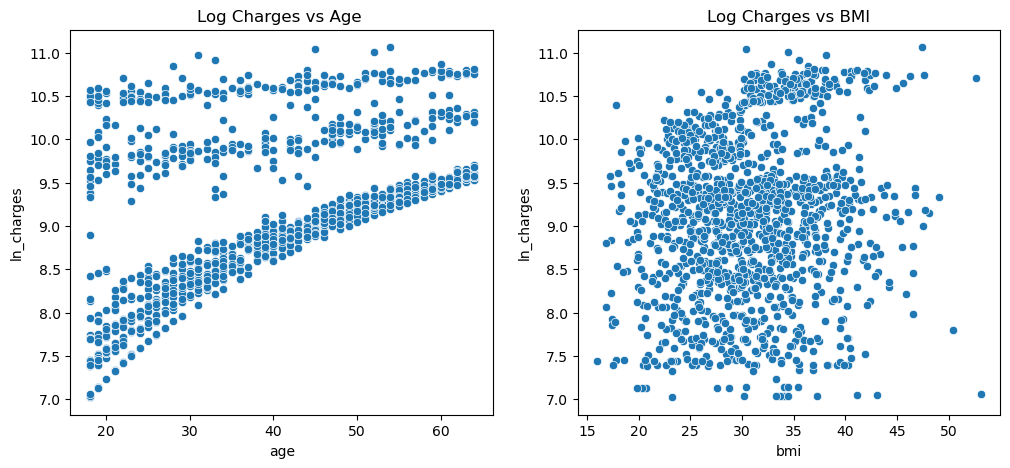

In [29]:
fig,axs = plt.subplots(1,2, figsize=(12,5))
sns.scatterplot(x="age",y="ln_charges",data=data,ax=axs[0])
axs[0].set_title("Log Charges vs Age ")
sns.scatterplot(x="bmi",y="ln_charges",data=data,ax=axs[1])
axs[1].set_title("Log Charges vs BMI")
plt.show()

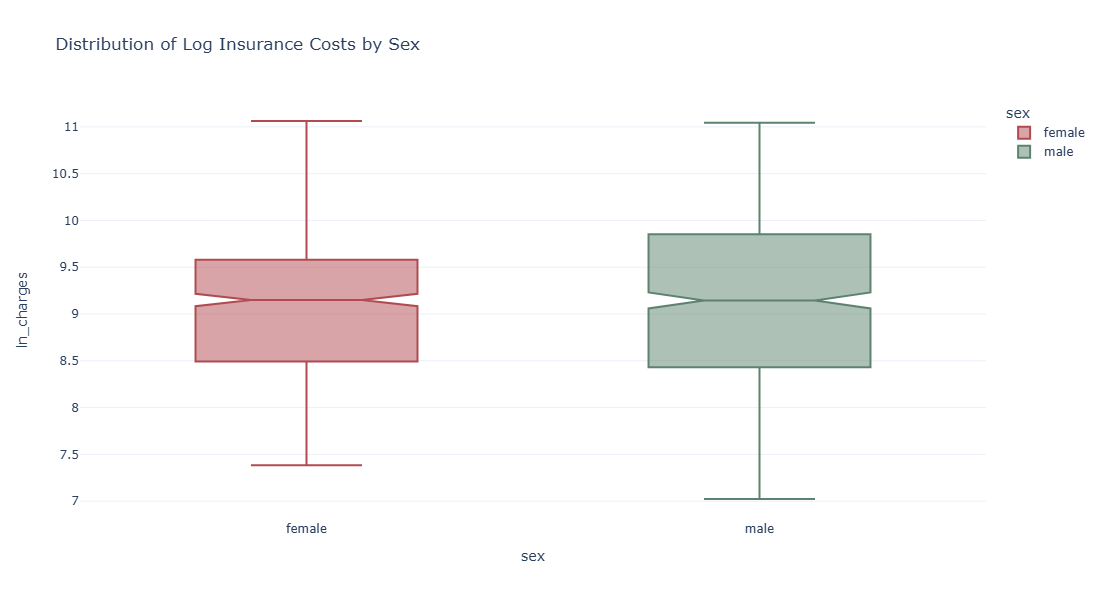

In [30]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.express as px

init_notebook_mode(connected=True)
px.defaults.template = "plotly_white"
plot_df=data1.copy()
fig = px.box(data, x="sex", y="ln_charges", color="sex", 
             notched=True, points="outliers", height=600,
             title="Distribution of Log Insurance Costs by Sex",
             color_discrete_sequence=['#B14B51','#5D8370',])

fig.show()

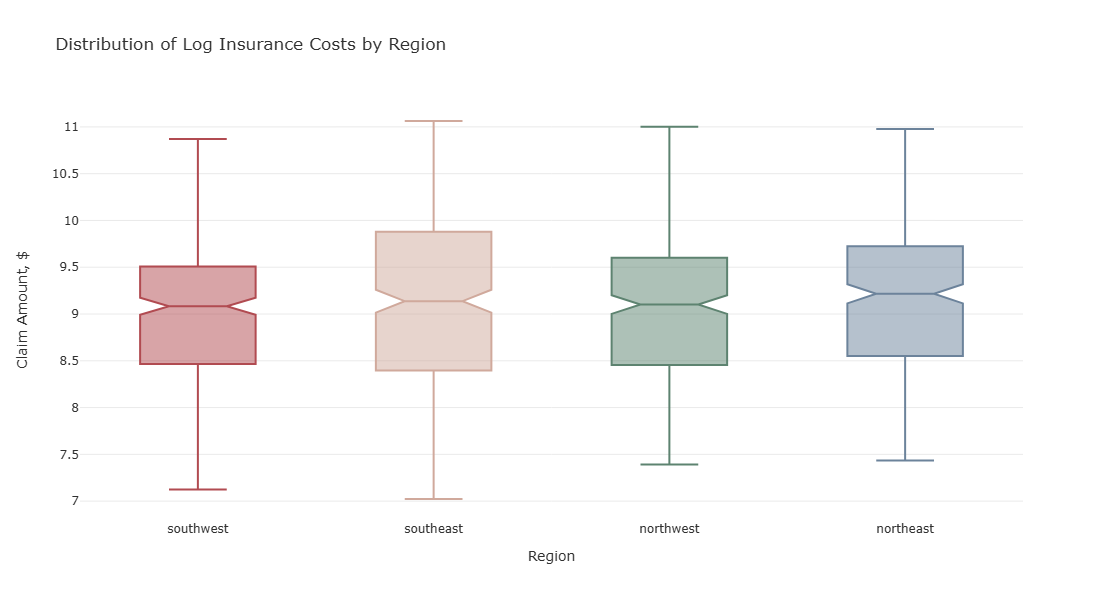

In [32]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.express as px

init_notebook_mode(connected=True)
px.defaults.template = "plotly_white"
plot_df=data1.copy()
fig = px.box(plot_df, x="region", y="ln_charges", color="region", 
             notched=True, points="outliers", height=600,
             title="Distribution of Log Insurance Costs by Region",
             color_discrete_sequence=['#B14B51', '#D0A99C', '#5D8370', '#6C839B'])
fig.update_traces(marker=dict(size=9, opacity=0.5, line=dict(width=1,color="#F7F7F7")), showlegend=False)
fig.update_layout(font_color="#303030", xaxis_title='Region', yaxis_title='Claim Amount, $',
                  yaxis=dict(showgrid=True, gridwidth=1, gridcolor='#EAEAEA', zerolinecolor='#EAEAEA'))
fig.show()

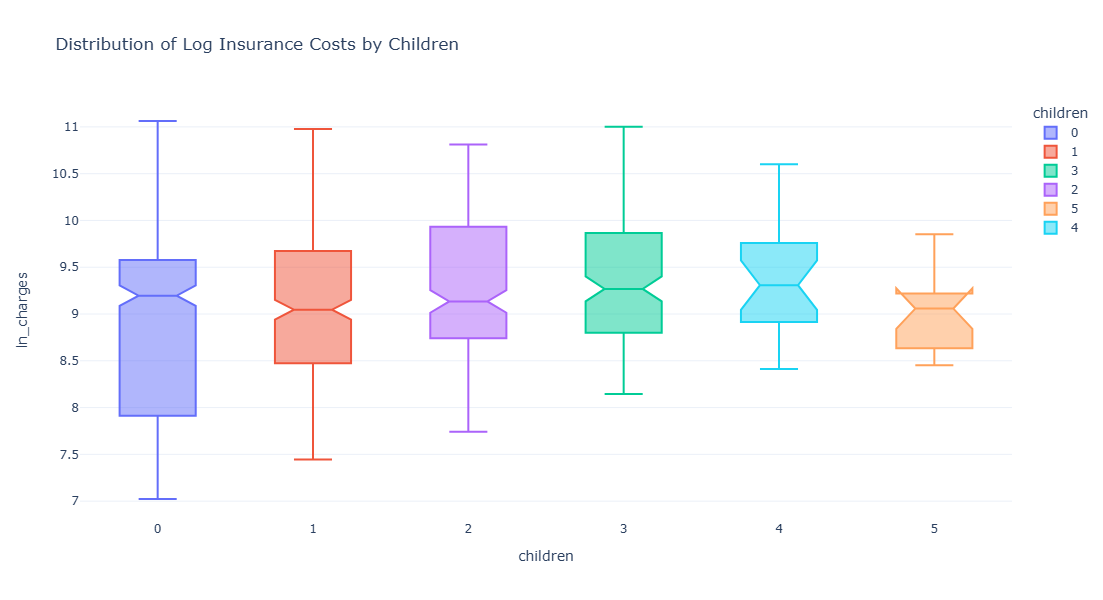

In [33]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.express as px

init_notebook_mode(connected=True)
px.defaults.template = "plotly_white"
plot_df=data1.copy()
fig = px.box(data, x="children", y="ln_charges", color="children", 
             notched=True, points="outliers", height=600,
             title="Distribution of Log Insurance Costs by Children")

fig.show()

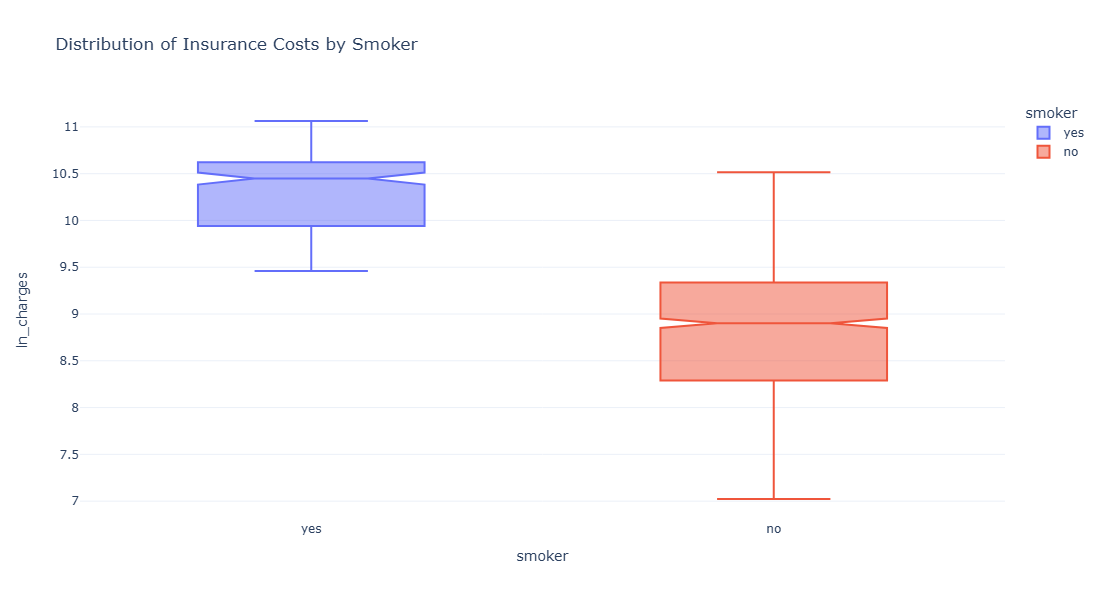

In [34]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.express as px

init_notebook_mode(connected=True)
px.defaults.template = "plotly_white"
plot_df=data1.copy()
fig = px.box(data, x="smoker", y="ln_charges", color="smoker", 
             notched=True, points="outliers", height=600,
             title="Distribution of Insurance Costs by Smoker")

fig.show()

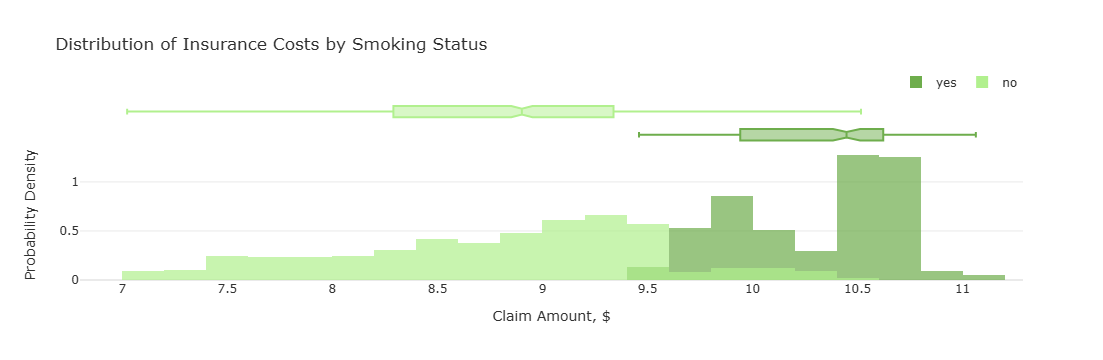

In [36]:
fig=px.histogram(data, x='ln_charges', color='smoker', opacity=0.7, barmode='overlay',
                 histnorm='probability density', marginal='box', 
                 title="Distribution of Insurance Costs by Smoking Status",
                 color_discrete_sequence=['#6ead4c','#b1f08e']) 
fig.update_layout(font_color="#303030", xaxis_title='Claim Amount, $',
                  yaxis=dict(title='Probability Density', gridcolor='#EAEAEA', zerolinecolor='#EAEAEA'),
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, title=""))
fig.update_xaxes(showgrid=False, zerolinecolor='#EAEAEA')
fig.show()


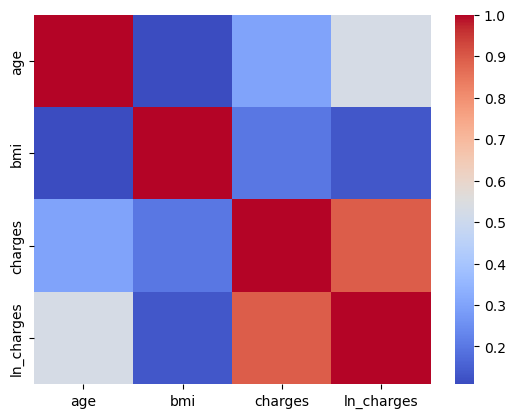

In [37]:
correlation = data[['age','bmi','charges','ln_charges']].corr()
sns.heatmap(correlation,cmap='coolwarm')
plt.show()

In [38]:
data = pd.get_dummies(data=data,columns=['sex','region','smoker'],drop_first=True)

### Fitting Using Linear Regression

In [40]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data['age2']= data['age']**2
formula = 'ln_charges ~  bmi + sex_male + region_northwest +  region_southeast + region_southwest + children + smoker_yes'
model = smf.ols(formula=formula, data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nModel Summary:")
print(model.summary())


Model Summary:
                            OLS Regression Results                            
Dep. Variable:             ln_charges   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     185.0
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          2.47e-191
Time:                        19:15:38   Log-Likelihood:                -1330.9
No. Observations:                1338   AIC:                             2678.
Df Residuals:                    1330   BIC:                             2719.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercep

### Verifying Model Assumptions

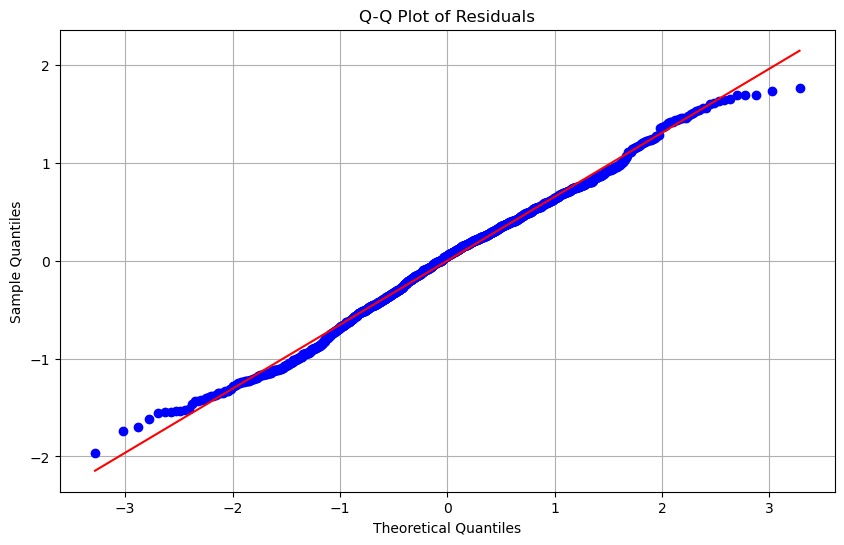

In [42]:
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(model.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()

The QQ Plot Shows the Residuals are normal and Durbin Watson Test Indicates that there is no presence of Autocorrelation

In [44]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### VIF For The Multicollinearity

In [46]:
X = data.drop(['age','charges','ln_charges','age2'],axis=1).astype(int)

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

            feature        VIF
0             const  29.576923
1               bmi   1.092969
2          children   1.002266
3          sex_male   1.008300
4  region_northwest   1.518800
5  region_southeast   1.651254
6  region_southwest   1.529782
7        smoker_yes   1.011702


### Testing For Homoskedasticity

In [52]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': 223.73641043986635, 'p-value': 1.0621178702272752e-44, 'f-value': 38.15068389729563, 'f p-value': 5.73231576654408e-49}


### Using Weighted Least Squares To Estimate Coefficients

In [57]:
residuals = model.resid
# Calculate weights (inverse of variance)
weights = 1 / (residuals**2)
# Fit the WLS model
wls_model = sm.WLS(data['ln_charges'],X,data=data, weights=weights).fit()
print(wls_model.summary())

                            WLS Regression Results                            
Dep. Variable:             ln_charges   R-squared:                       0.994
Model:                            WLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 3.273e+04
Date:                Sat, 24 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:15:39   Log-Likelihood:                -538.76
No. Observations:                1338   AIC:                             1094.
Df Residuals:                    1330   BIC:                             1135.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.1309      0.007  

C:\Users\dhruv\anaconda3\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning:

unknown kwargs ['data']

